## Housing Data Analysis with Model Creation and Evaluation

#### Import the necessary libraries and data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats #To allow P-Value to be calculated in order to measure the significance of correlation between variables.
from sklearn.linear_model import LinearRegression #Library necessary for Linear regression model
import numpy as np #For standardising data, dealing with skewdness and other preprocessing techniques
from sklearn.preprocessing import PolynomialFeatures # for performing polynomial transform on multiple varibles
from sklearn.preprocessing import StandardScaler # for standardizing features for multivariable polynomial model
from sklearn.preprocessing import RobustScaler # for addressing the outliers when standarsizing the data
from sklearn.pipeline import Pipeline # For creating a pipeline for producing polynomial models
from sklearn.metrics import mean_squared_error # For calculating mean squared error to assess accuracy of models
from sklearn.metrics import r2_score # For calculating R-Squared for polynomial model
from sklearn.model_selection import train_test_split # For training and testing models

In [2]:
directory = r'C:\Users\ellio\Documents\Data_Analytics\Portfolio\King County Housing Data Regression Model (Python)\Dataset'
file = 'King_County_USA_Housing_Data.csv'
file_path = ''
file_path = directory + "\\" + file

df = pd.read_csv(file_path)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Inspecting the data

In [3]:
df.info()

#No null values in any columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df.describe()

# If you want to look at columns with the data type 'object' use the following code:
# df.describe(include='object')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Cleaning the Data

In [5]:
df.duplicated().value_counts()

#no duplicates in the dataset

False    21613
dtype: int64

#### Observing relationships between variables

<AxesSubplot:>

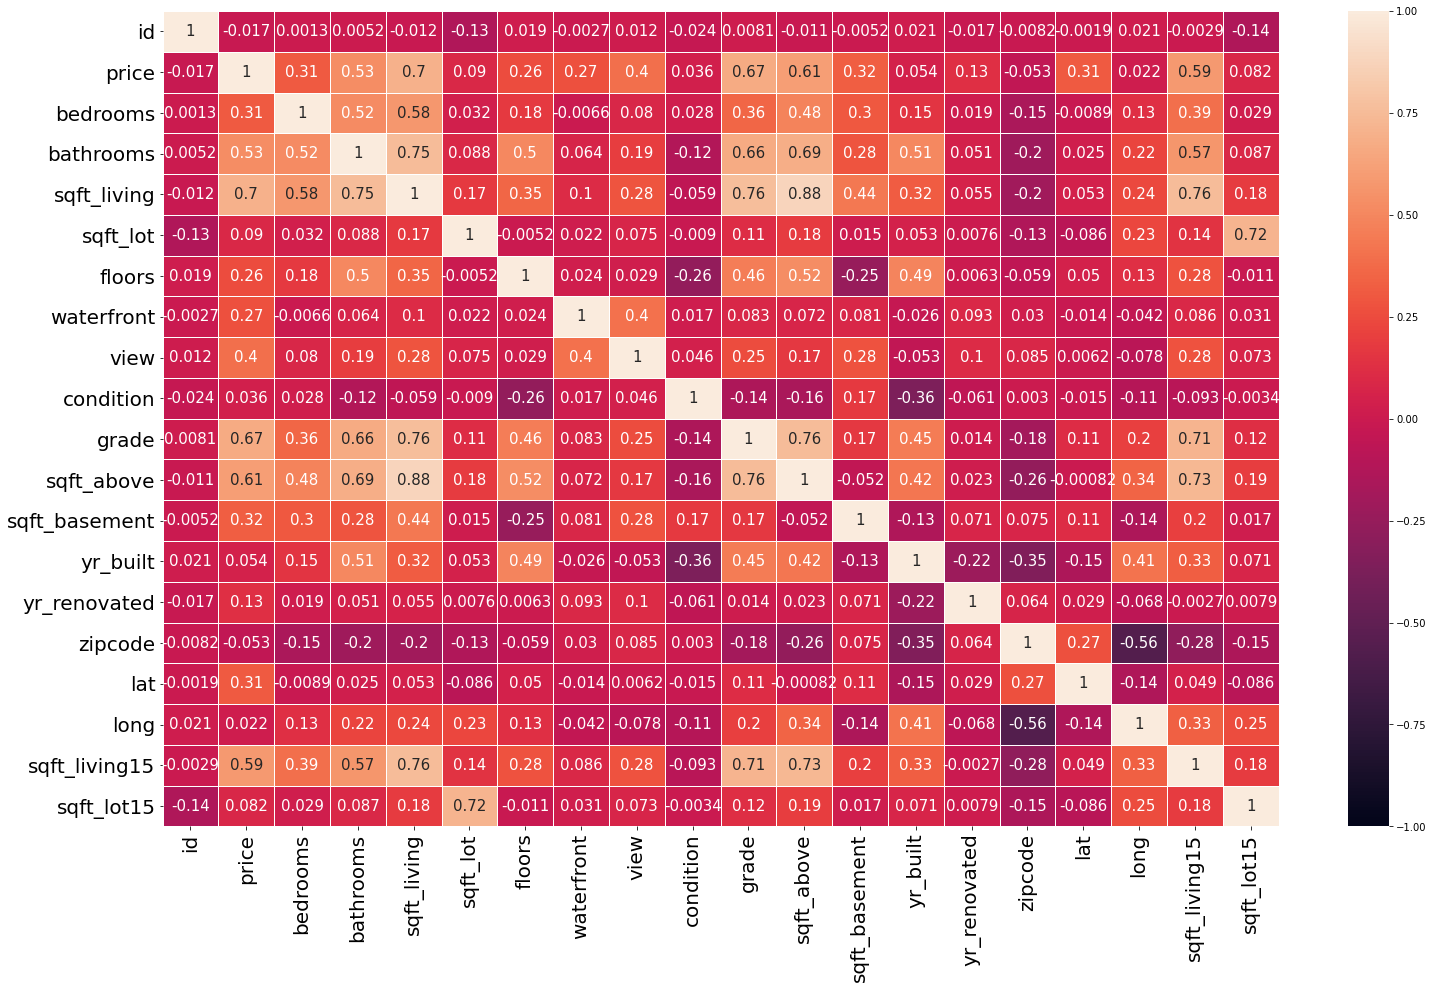

In [6]:
plt.figure(figsize=[25,15])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, annot_kws={'size':15}, linewidth=0.5)

In [7]:
# Looking at which variable have the most effect on price

correlation_df = df.corr()['price'].to_frame().reset_index()
correlation_df.columns = ['Variable', 'Pearson Correlation']
correlation_df = correlation_df.sort_values('Pearson Correlation', ascending=False).reset_index(drop=True)
correlation_df

,Variable,Pearson Correlation
0,price,1.000000
1,sqft_living,0.702035
2,grade,0.667434
3,sqft_above,0.605567
4,sqft_living15,0.585379
5,bathrooms,0.525138
6,view,0.397293
7,sqft_basement,0.323816
8,bedrooms,0.308350
9,lat,0.307003


#### Use P-Value to measure the probability that the correlation between two variables is statistically significant

<p>Normally the threshold for significant correlation is a p value below 0.05, indicating that there is a 95% confidence that the correlation is significant.

Investopedia's definition of P-Value is a measure of the probability that an observed difference could have occurred just by random chance.</p>

In [8]:
p_value_df = pd.DataFrame(columns=['Variable','Pearson-Coefficient', 'P-Value'])

for variable in correlation_df['Variable']:
    pearson_coef, p_value = stats.pearsonr(df['price'], df[variable])
    p_value_df = p_value_df.append({'Variable':variable, 'Pearson-Coefficient':pearson_coef, 'P-Value':p_value}, ignore_index=True)

p_value_df

# P-Values of zero for a lot of variables??????

,Variable,Pearson-Coefficient,P-Value
0,price,1.000000,0.000000e+00
1,sqft_living,0.702035,0.000000e+00
2,grade,0.667434,0.000000e+00
3,sqft_above,0.605567,0.000000e+00
4,sqft_living15,0.585379,0.000000e+00
5,bathrooms,0.525138,0.000000e+00
6,view,0.397293,0.000000e+00
7,sqft_basement,0.323816,0.000000e+00
8,bedrooms,0.308350,0.000000e+00
9,lat,0.307003,0.000000e+00


In [9]:
#Another method to add rows to a df is this way...

#p_value_df = pd.DataFrame(columns=['Variable','Pearson-Coefficient', 'P-Value'])

#columns = list(p_value_df)
#data = []

#for variable in correlation_df['Variable']:
    #pearson_coef, p_value = stats.pearsonr(df['price'], df[variable])
    #values = [ variable, pearson_coef, p_value]
    #zipped = zip(columns, values)
    #a_dictionary = dict(zipped)
    #data.append(a_dictionary)

#p_value_df = p_value_df.append(data, ignore_index=True)
#p_value_df

In [10]:
# isolating the variables with the highest correlation with price

top_correlation_df = p_value_df.loc[p_value_df['Pearson-Coefficient'] >= 0.5]
top_correlation_df

,Variable,Pearson-Coefficient,P-Value
0,price,1.000000,0.0
1,sqft_living,0.702035,0.0
2,grade,0.667434,0.0
3,sqft_above,0.605567,0.0
4,sqft_living15,0.585379,0.0
5,bathrooms,0.525138,0.0


#### Visualizing correlations

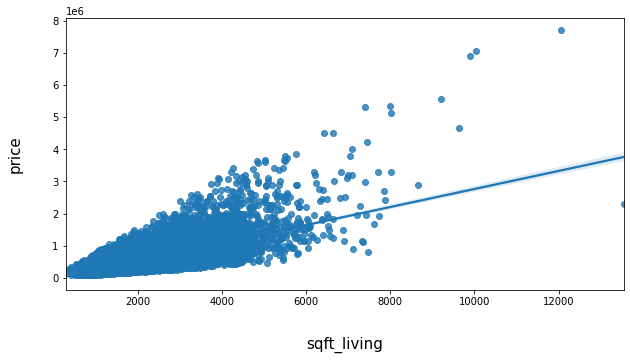

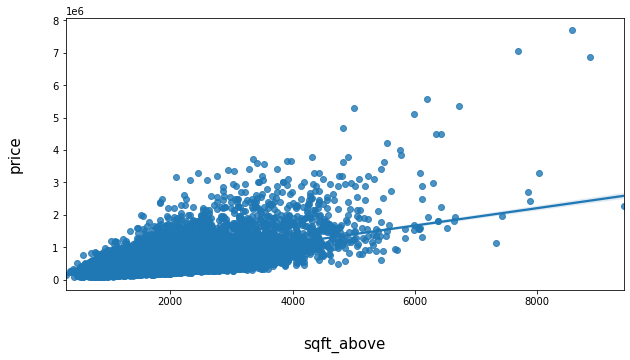

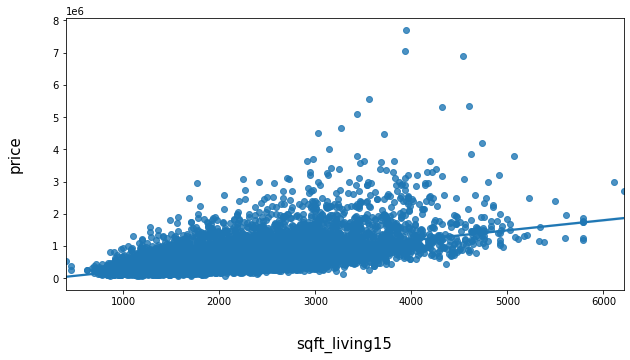

In [11]:
#Visualizing correlations using regression plots in seaborn

plt.figure(figsize=[10,5])
plt.xticks(size=10)
plt.yticks(size=10)
plt.xlabel('sqft_living', size=15, labelpad=30)
plt.ylabel('Price', size=15, labelpad=30)
sns.regplot(x="sqft_living", y='price', data=df)
plt.show()

plt.figure(figsize=[10,5])
plt.xticks(size=10)
plt.yticks(size=10)
plt.xlabel('sqft_above', size=15, labelpad=30)
plt.ylabel('Price', size=15, labelpad=30)
sns.regplot(x="sqft_above", y='price', data=df)
plt.show()

plt.figure(figsize=[10,5])
plt.xticks(size=10)
plt.yticks(size=10)
plt.xlabel('sqft_living15', size=15, labelpad=30)
plt.ylabel('Price', size=15, labelpad=30)
sns.regplot(x="sqft_living15", y='price', data=df)
plt.show()

#### Visualizing categorical variables

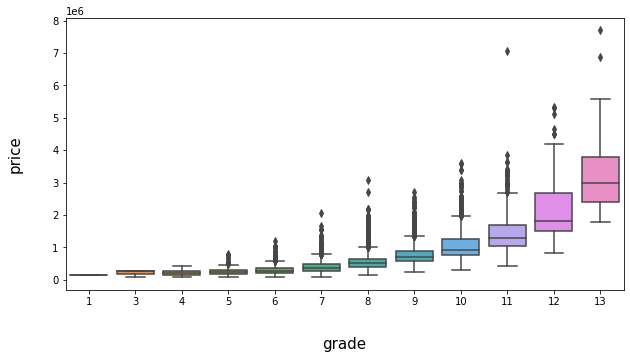

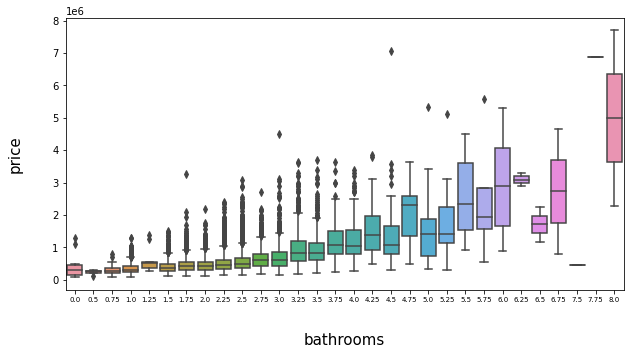

In [12]:
#Visualizing categorical correlations using boxplots

plt.figure(figsize=[10,5])
plt.xticks(size=10)
plt.yticks(size=10)
plt.xlabel('Grade', size=15, labelpad=30)
plt.ylabel('Price', size=15, labelpad=30)
sns.boxplot(x='grade', y='price', data=df)
plt.show()


plt.figure(figsize=[10,5])
plt.xticks(size=7)
plt.yticks(size=10)
plt.xlabel('Bathrooms', size=15, labelpad=30)
plt.ylabel('Price', size=15, labelpad=30)
sns.boxplot(x='bathrooms', y='price', data=df)
plt.show()

### Creating regression models

#### Linear Regression

In [13]:
linear_model = LinearRegression()
linear_model

LinearRegression()

In [14]:
# Use sqft_living to predict house price.
X = df[['sqft_living']]
Y = df['price']

In [15]:
# Fit the model using the data
linear_model.fit(X, Y)

LinearRegression()

In [16]:
# Predict house price for each value of sqft_living and store it in a variable 'Yhat'
linear_model_Yhat = linear_model.predict(X)

In [17]:
# Predicting house price from a specific Sqft_living value
specific_X_value = 10000
specific_prediction = linear_model.predict([[specific_X_value]])
specific_prediction

array([2762654.93588001])

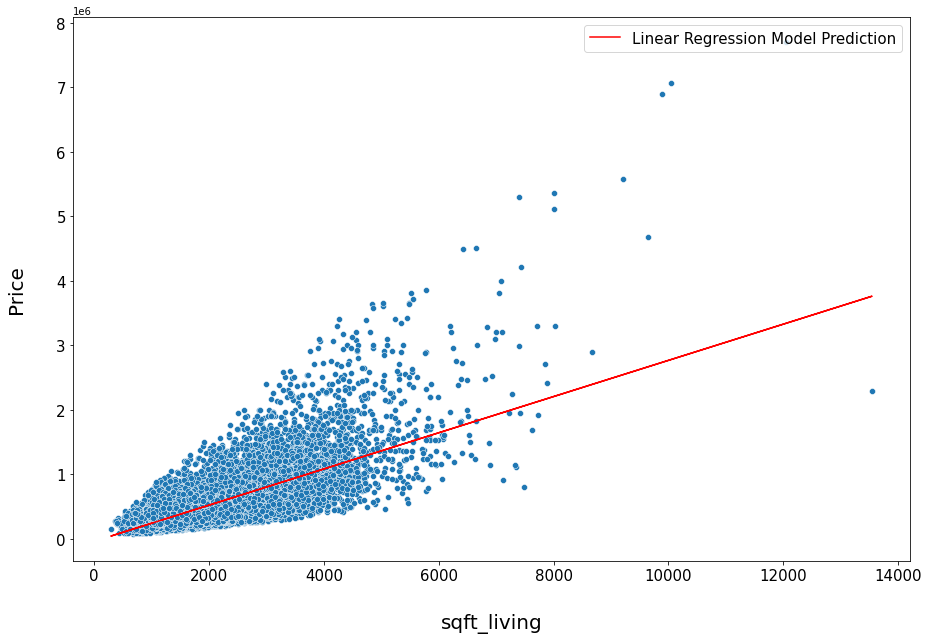

In [18]:
# Visualizing model predictions against the data
plt.figure(figsize=[15,10])
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('sqft_living', size=20, labelpad=30)
plt.ylabel('Price', size=20, labelpad=30)
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.plot(df['sqft_living'], linear_model_Yhat, color='red', label='Linear Regression Model Prediction')
plt.legend(fontsize=15, loc='upper right')
plt.show()

In [19]:
# The linear regression model is of the form y = mx + c
# Where m is the gradient and c is the intercept on the y axis
# Let's find what the gradient and intercept is of the line
print(linear_model.intercept_)
print(linear_model.coef_)

-43580.743094473146
[280.6235679]


#### Multiple Linear Regression

In [20]:
multivariable_linear_model = LinearRegression()

In [21]:
# Using multiple variables to fit the model and predict house price

Z = df[['sqft_living', 'sqft_above', 'sqft_living15', 'grade', 'bathrooms']]
Y = df['price']

multivariable_linear_model.fit(Z,Y)

LinearRegression()

In [22]:
multivariable_linear_model_Yhat = multivariable_linear_model.predict(Z)
Z

,sqft_living,sqft_above,sqft_living15,grade,bathrooms
0,1180,1180,1340,7,1.00
1,2570,2170,1690,7,2.25
2,770,770,2720,6,1.00
3,1960,1050,1360,7,3.00
4,1680,1680,1800,8,2.00
...,...,...,...,...,...
21608,1530,1530,1530,8,2.50
21609,2310,2310,1830,8,2.50
21610,1020,1020,1020,7,0.75
21611,1600,1600,1410,8,2.50


In [23]:
# How to predict price with specific values for all the input variables???

#specific_z_value = 
#specific_prediction = linear_model.predict([[specific_z_value]])
#specific_prediction

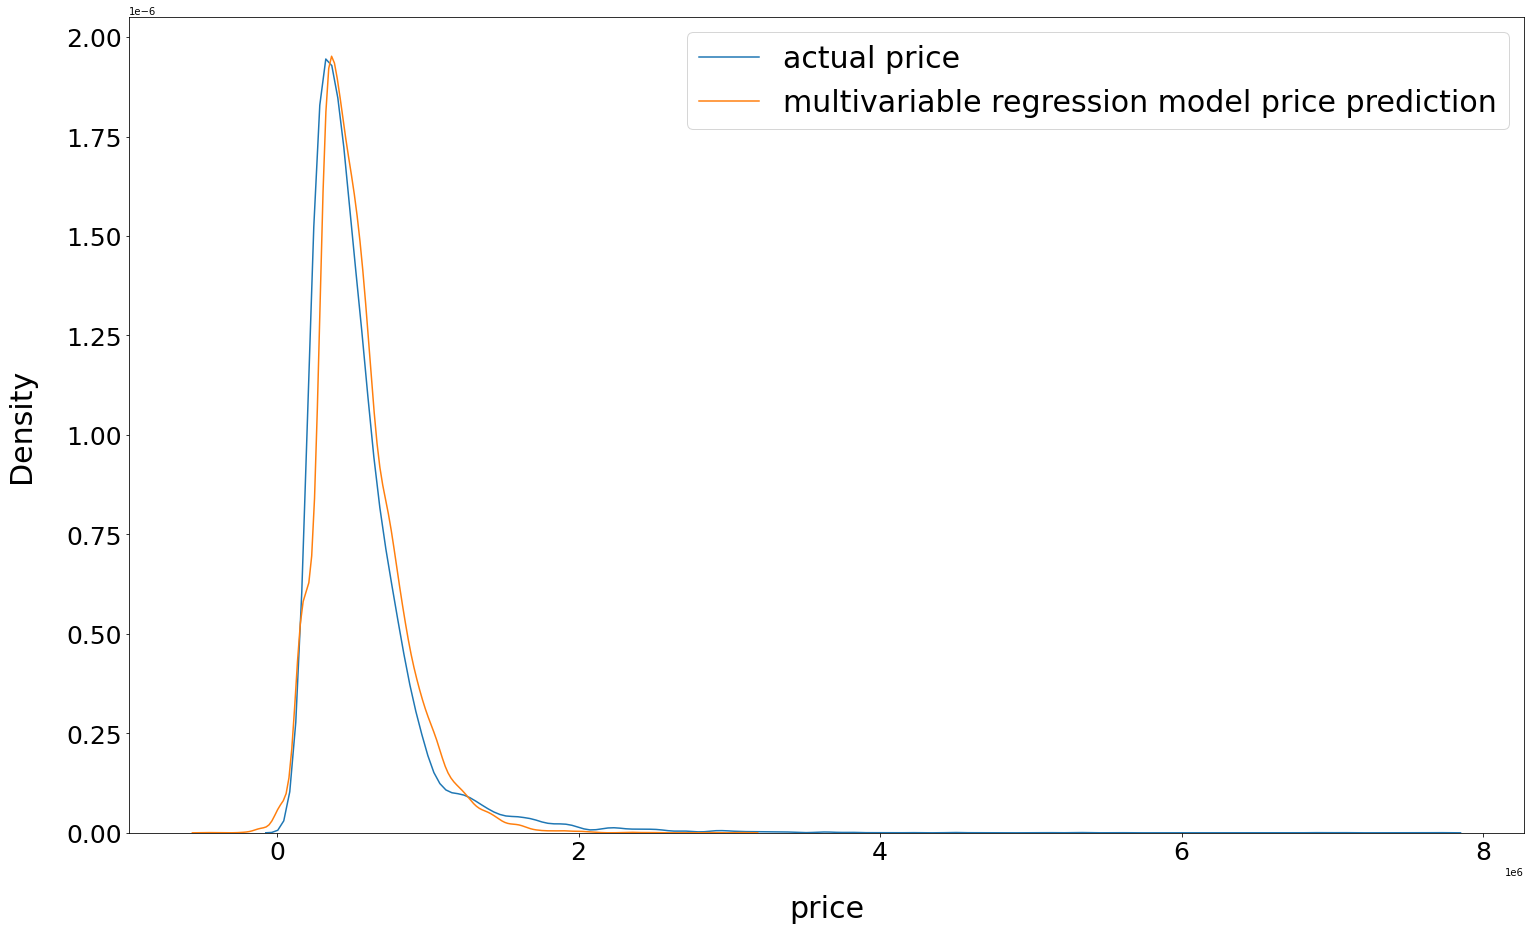

In [24]:
# Visualizing multivariable models is not as simple as using a regression plot
# A good way to visualize a multivariable is comparing the distribution of predicted values to the actual values

plt.figure(figsize=[25,15])
sns.kdeplot(df['price'], label='actual price')
sns.kdeplot(multivariable_linear_model_Yhat, label='multivariable regression model price prediction')
plt.xticks(size=25)
plt.yticks(size=25)
plt.xlabel('price', fontsize=30, labelpad=30)
plt.ylabel('Density', fontsize=30, labelpad=30)
plt.legend(fontsize=30, loc='upper right')
plt.show()

# The distribution of price in the data is positively skewed
# We can normalize this by taking the log of the price

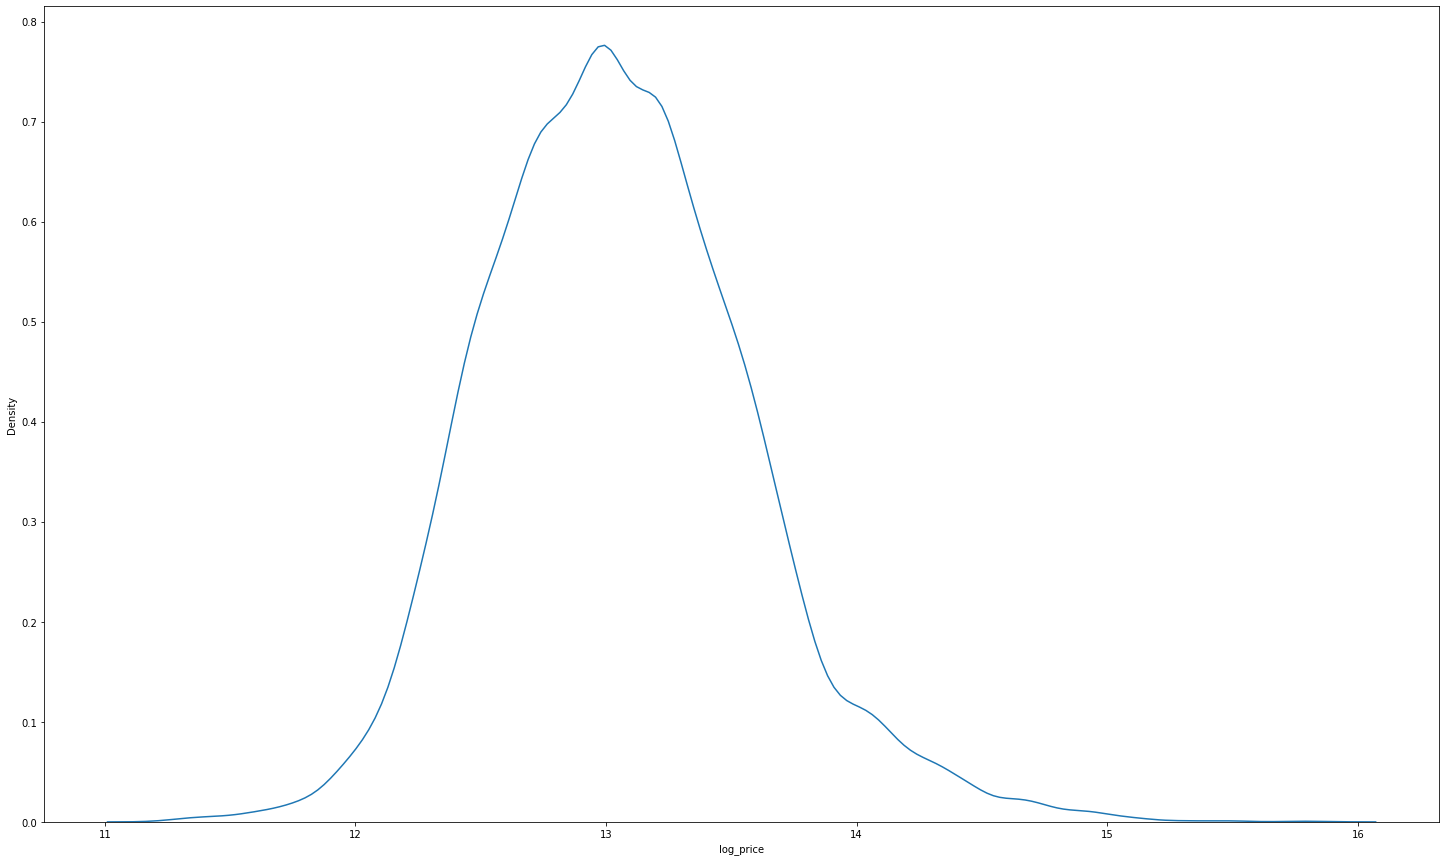

In [25]:
#Taking the logrithm of price to reduce the skewness of the data
df['log_price'] = np.log(df['price'])

plt.figure(figsize=[25,15])
sns.kdeplot(df['log_price'])
plt.show()

<ipython-input-26-49608ff00329>:3: RuntimeWarning: invalid value encountered in log
  log_Yhat = np.log(multivariable_linear_model_Yhat)


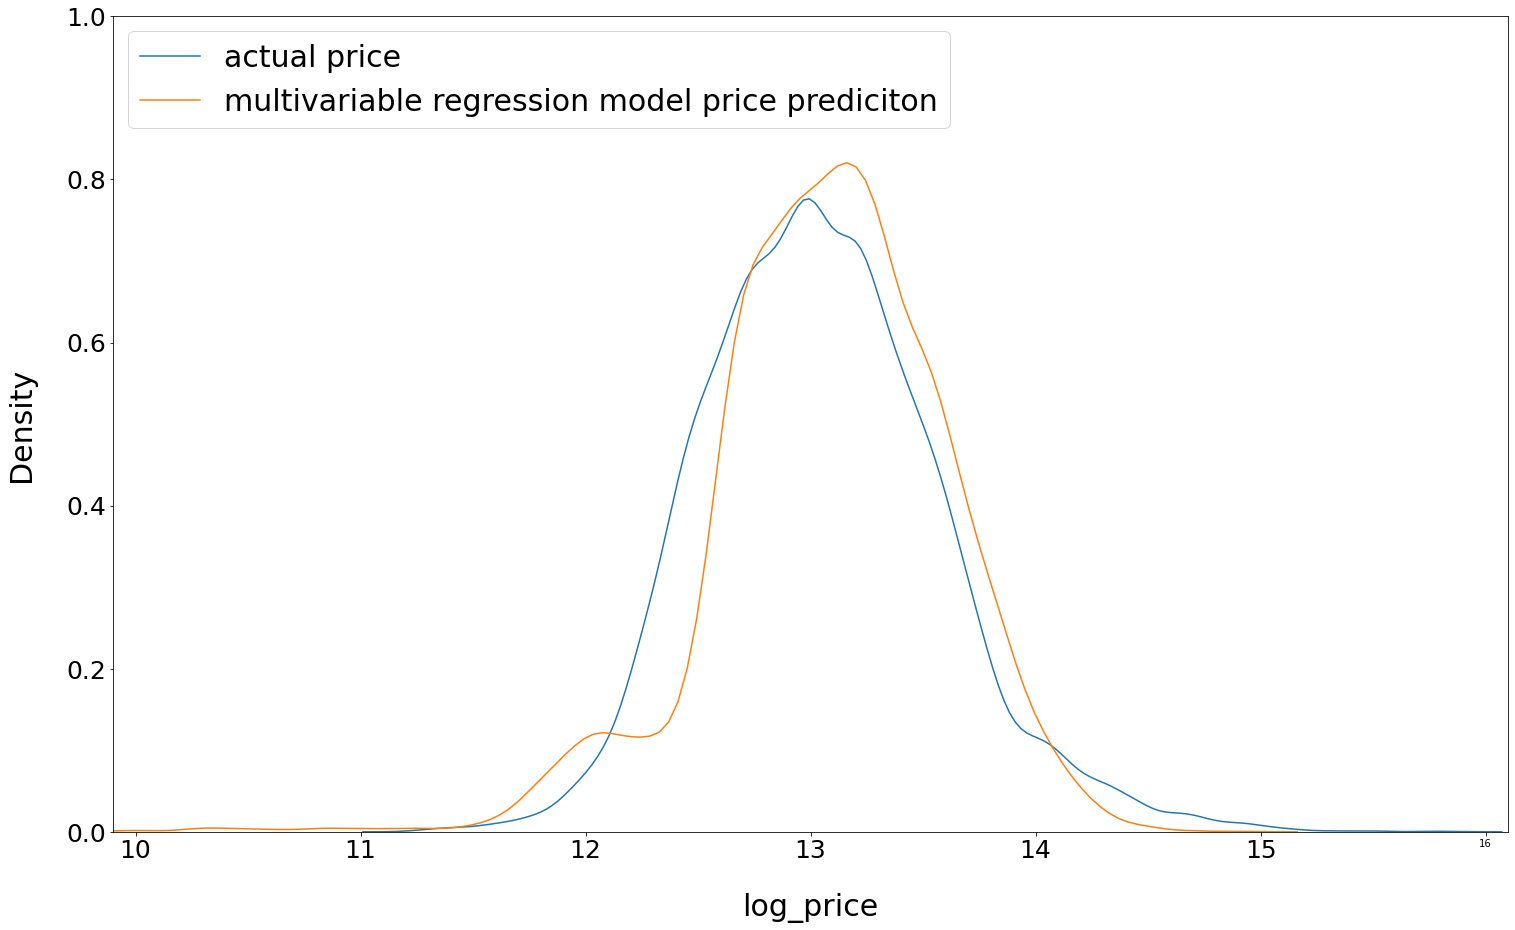

In [26]:
# Comparing the distribution of predicted price to acutal price data

log_Yhat = np.log(multivariable_linear_model_Yhat)

plt.figure(figsize=[25,15])
sns.kdeplot(df['log_price'], label='actual price')
sns.kdeplot(log_Yhat, label='multivariable regression model price prediciton')
plt.xticks(size=25)
plt.yticks(size=25)
plt.xlabel('log_price', fontsize=30, labelpad=30)
plt.ylabel('Density', fontsize=30, labelpad=30)
plt.legend(fontsize=30, loc='upper left')
plt.xlim(9.9,16.1)
plt.ylim(0,1)
plt.show()

# The fit is ok but there is room for improvement

#### Polynomial Model

In [27]:
# defining the variables

poly_x = df['sqft_living']
Y = df['price']

            10            9             8             7             6
-1.829e-31 x  + 1.09e-26 x - 2.709e-22 x + 3.651e-18 x - 2.919e-14 x
              5             4             3         2
 + 1.437e-10 x - 4.448e-07 x + 0.0008827 x - 1.078 x + 867.5 x - 2.283e+04


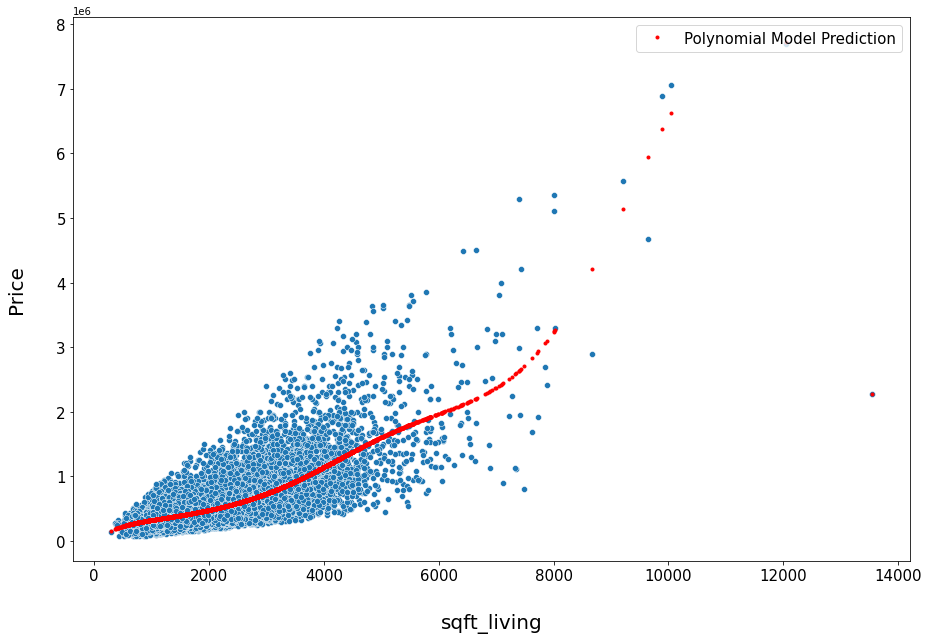

In [28]:
# we will use cubic polynomial to fit the data

polynomial_model = np.polyfit(poly_x, Y, 10)
polynomial = np.poly1d(polynomial_model)
print(polynomial)

polynomial_model_Yhat = np.polyval(polynomial, df['sqft_living'])

plt.figure(figsize=[15,10])
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('sqft_living', size=20, labelpad=30)
plt.ylabel('Price', size=20, labelpad=30)
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.plot(df['sqft_living'], polynomial_model_Yhat, '.', color='red', label='Polynomial Model Prediction')
plt.legend(fontsize=15, loc='upper right')
plt.show()

#### Multivariable polynomial model

In [29]:
# define variables

Y = df['price']
#Z1 = df.drop(columns=['id','date','price','zipcode', 'lat','long', 'log_price'])
#Z1.columns

Z1 = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15']]

(21613, 816)


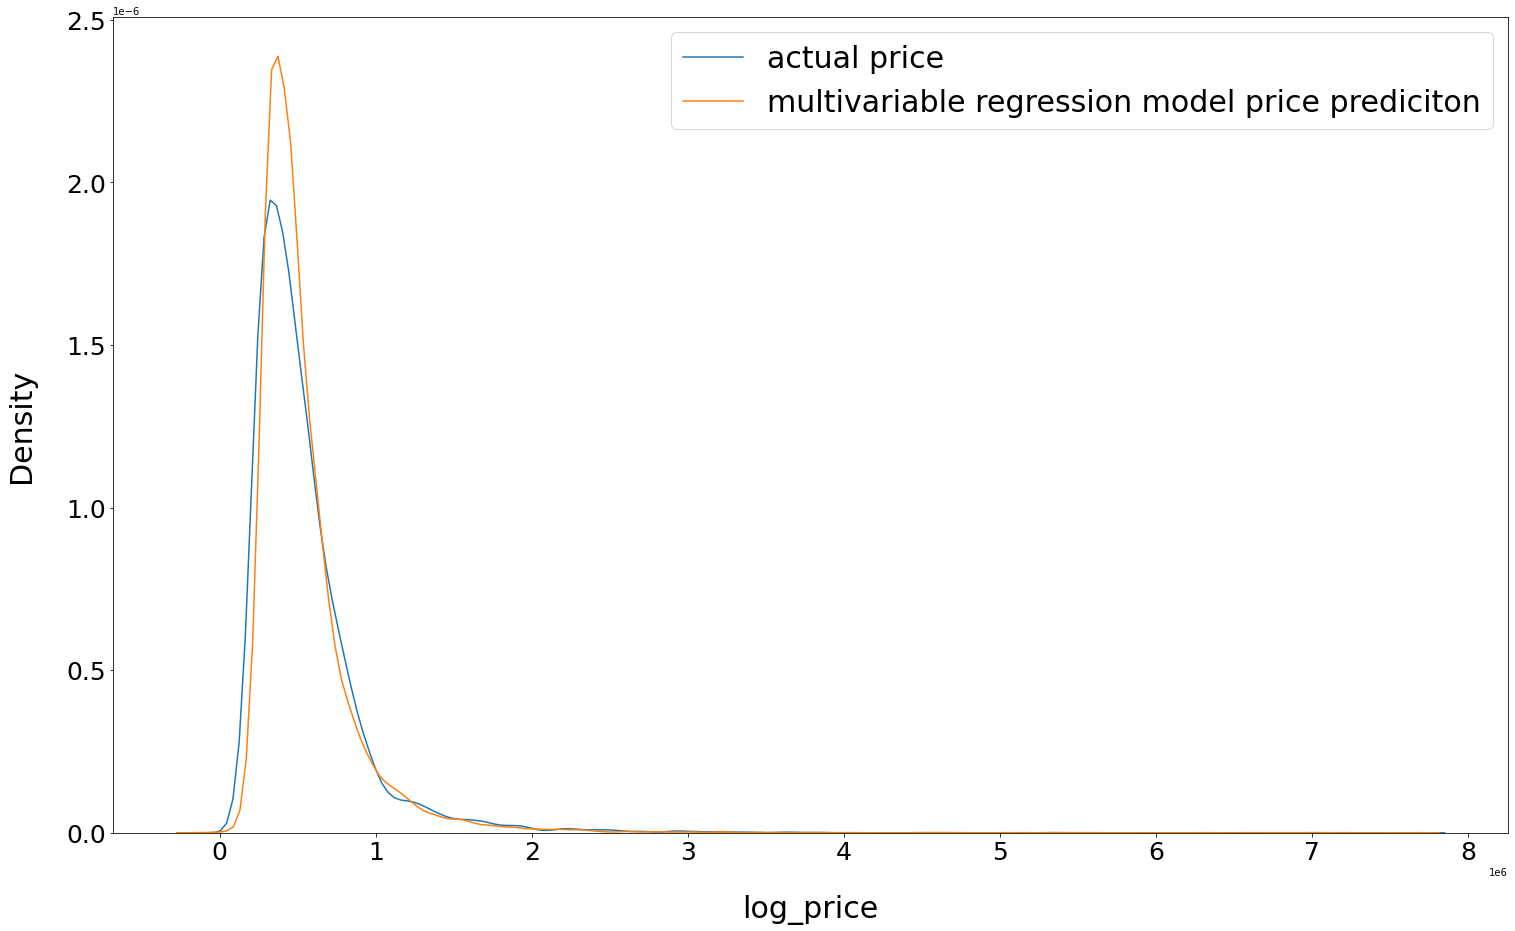

In [30]:
# Create a polynomial features object
polynomial_object = PolynomialFeatures(degree=3)

# Perform a 3rd degree polynomial transformation on the variables selected
multivariable_polynomial_model = polynomial_object.fit_transform(Z1)

# The number of terms in the polynomial expression
print(multivariable_polynomial_model.shape)

# Fit the polynomial expression to the pricing data
poly_reg = LinearRegression()
poly_reg.fit(multivariable_polynomial_model, Y)

poly_yhat = poly_reg.predict(multivariable_polynomial_model)

# Visualizing with distribution plot
plt.figure(figsize=[25,15])
sns.kdeplot(df['price'], label='actual price')
sns.kdeplot(poly_yhat, label='multivariable regression model price prediciton')
plt.xticks(size=25)
plt.yticks(size=25)
plt.xlabel('log_price', fontsize=30, labelpad=30)
plt.ylabel('Density', fontsize=30, labelpad=30)
plt.legend(fontsize=30, loc='upper right')
plt.xlim()
plt.ylim()
plt.show()

# This is how to do the single step of creating the polynomial
# However it is often necessary to do other preprocessing steps such as standardizing the data
# We will look at combining these steps next by creating a pipeline

### Pipelines

<p>
    When fitting machine learning models different variables are measured at different scales and do not contribute equally to the model fitting. To avoid this bias standardizing the data is necesary.
    
This can be done in python using StandardScaler(). One thing to note is that outliers can influence standard scaler. One way to deal with outliers is to use RobustScaler(). This will scale the features and use statistics that are robust to outliers.

In [31]:
# Creating a pipeline by using a tuple of inputs each representing a stage in the pipeline
# USE ROBUST SCALER AND STANDARD SCALER AND COMPARE?

Input = [('scaler', RobustScaler()), ('polynomial', PolynomialFeatures(degree=4, include_bias=False)),('model', LinearRegression())]

pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scaler', RobustScaler()),
                ('polynomial',
                 PolynomialFeatures(degree=4, include_bias=False)),
                ('model', LinearRegression())])

In [32]:
pipe.fit(Z1,Y)

Pipeline(steps=[('scaler', RobustScaler()),
                ('polynomial',
                 PolynomialFeatures(degree=4, include_bias=False)),
                ('model', LinearRegression())])

In [33]:
pipe_Yhat = pipe.predict(Z1)
pipe_Yhat

array([340124.95236098, 665351.7010583 , 225854.90887279, ...,
       265346.10505059, 436124.87774337, 265669.54919149])

<ipython-input-34-361fe1305371>:5: RuntimeWarning: invalid value encountered in log
  sns.kdeplot(np.log(pipe_Yhat), label='multivariable polynomial model price prediciton')


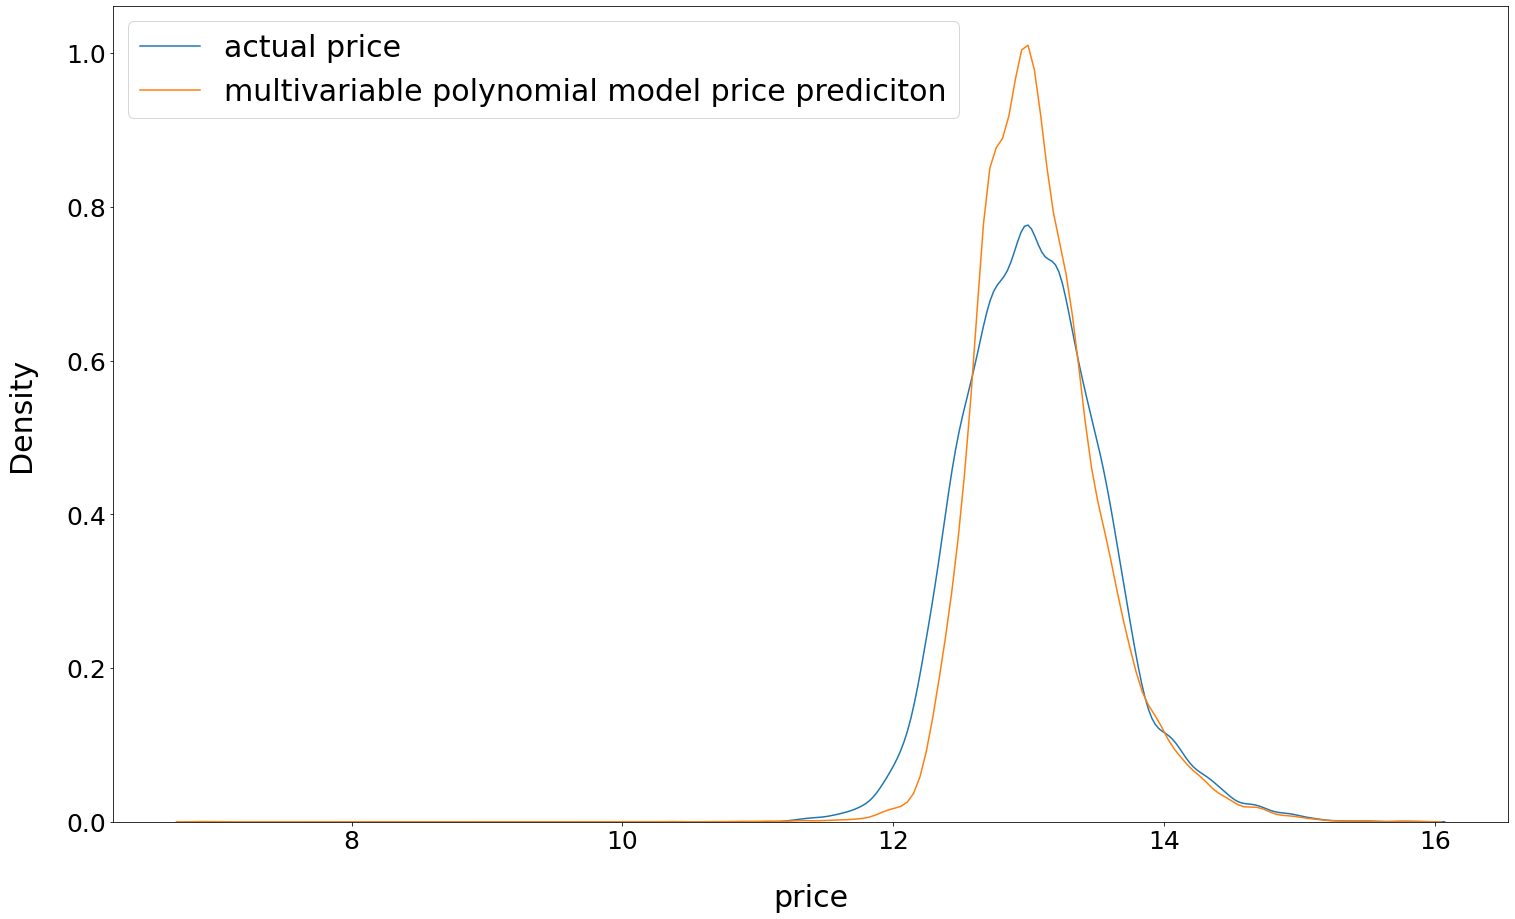

In [34]:
# Visualizing the distribution of mulitvariable polynomial model against the distribution of pricing data

plt.figure(figsize=[25,15])
sns.kdeplot(np.log(df['price']), label='actual price')
sns.kdeplot(np.log(pipe_Yhat), label='multivariable polynomial model price prediciton')
plt.xticks(size=25)
plt.yticks(size=25)
plt.xlabel('price', fontsize=30, labelpad=30)
plt.ylabel('Density', fontsize=30, labelpad=30)
plt.legend(fontsize=30, loc='upper left')
plt.xlim()
plt.ylim()
plt.show()

# The distributions are fairly close
# We will evaluate the models further by looking at R-Squared & RME values for each model

### Determining accuracy of model with R-Squared and Root Mean Square

#### We will calculate both mean squared error and r squared for both the single variable linear regression and the multivariable linear regression and compare both

In [35]:
print('Single variable regression R-Square: ', linear_model.score(X,Y))
print('Single variable regression Root Mean Square: ', mean_squared_error(df['price'], linear_model_Yhat))

print('Multivariable regression R-Square: ', multivariable_linear_model.score(Z,Y))
print('Multivariable regression Root Mean Square: ', mean_squared_error(df['price'], multivariable_linear_model_Yhat))

print('Polynomial model R-Square: ', r2_score(Y, polynomial_model_Yhat))
print('Polynomial model Root Mean Square: ', mean_squared_error(df['price'], polynomial_model_Yhat))

print('Multivariable polynomial model R-Square: ', r2_score(Y, pipe_Yhat))
print('Multivariable polynomial model Root Mean Square: ', mean_squared_error(df['price'], pipe_Yhat))

Single variable regression R-Square:  0.4928532179037931
Single variable regression Root Mean Square:  68351286833.039825
Multivariable regression R-Square:  0.544219816528976
Multivariable regression Root Mean Square:  61428294831.088295
Polynomial model R-Square:  0.5522850538288326
Polynomial model Root Mean Square:  60341293261.6798
Multivariable polynomial model R-Square:  0.8553895632348595
Multivariable polynomial model Root Mean Square:  19490036792.76075


<p>
    The model with the highest R-Squared value is a better fit for the data. Regarding MSE, the model with the smallest MSE value is a better fit for the data.
    
Based on the values obtained for each model, the multivariable polynomial model is the best to predict house price.

<p>

By splitting the data into test and train datasets we can see if the model demonstrates overfitting or underfitting. If the model is overfitted then the distribution for the training data will be reasonably accurate, however when it comes to predicting the test data the distribution is significantly worse.

Underfitting is where the model fits the data and then drops off at higher values and is indicated by a negative R-Squared value.

In the next section we will use training data to create models and then use the testing data to see if the model is underfitting or over fitting.

### Training and Testing Model

In [36]:
# We start by splitting the pricing data from the main data set

y_data = df['price']
x_data = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15']]

In [37]:
# Split the dataset into x & y training and testing datsets

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=7)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(17290, 15)
(17290,)
(4323, 15)
(4323,)


In [38]:
lre = LinearRegression()

lre.fit(x_train[['sqft_living', 'sqft_lot', 'floors', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']], y_train)

LinearRegression()

#### Testing for underfitting

In [39]:
# Comparing differences in distribution between predictions with training data and testing data

train_Yhat = lre.predict(x_train[['sqft_living', 'sqft_lot', 'floors', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']])

test_Yhat = lre.predict(x_test[['sqft_living', 'sqft_lot', 'floors', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']])

<ipython-input-40-5b5c1c66c11b>:3: RuntimeWarning: invalid value encountered in log
  sns.kdeplot(np.log(train_Yhat), label='predicted price training data')


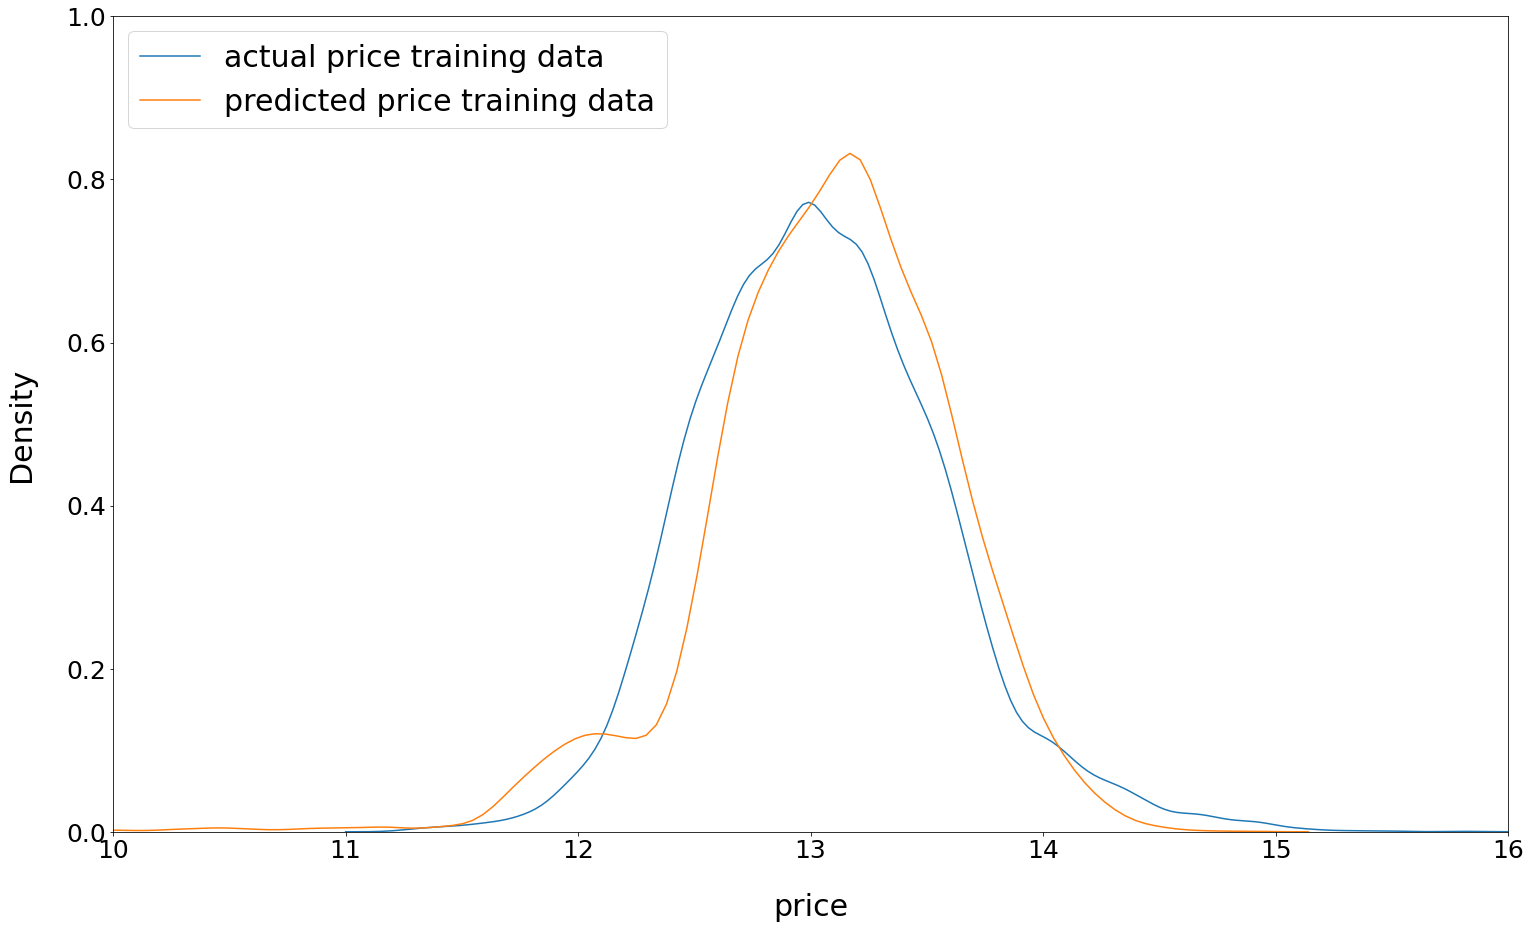

In [40]:
plt.figure(figsize=[25,15])
sns.kdeplot(np.log(y_train), label='actual price training data')
sns.kdeplot(np.log(train_Yhat), label='predicted price training data')
plt.xticks(size=25)
plt.yticks(size=25)
plt.xlabel('price', fontsize=30, labelpad=30)
plt.ylabel('Density', fontsize=30, labelpad=30)
plt.legend(fontsize=30, loc='upper left')
plt.xlim(10,16)
plt.ylim(0,1)
plt.show()

<ipython-input-41-c3db337a8b38>:3: RuntimeWarning: invalid value encountered in log
  sns.kdeplot(np.log(test_Yhat), label='predicted price testing data')


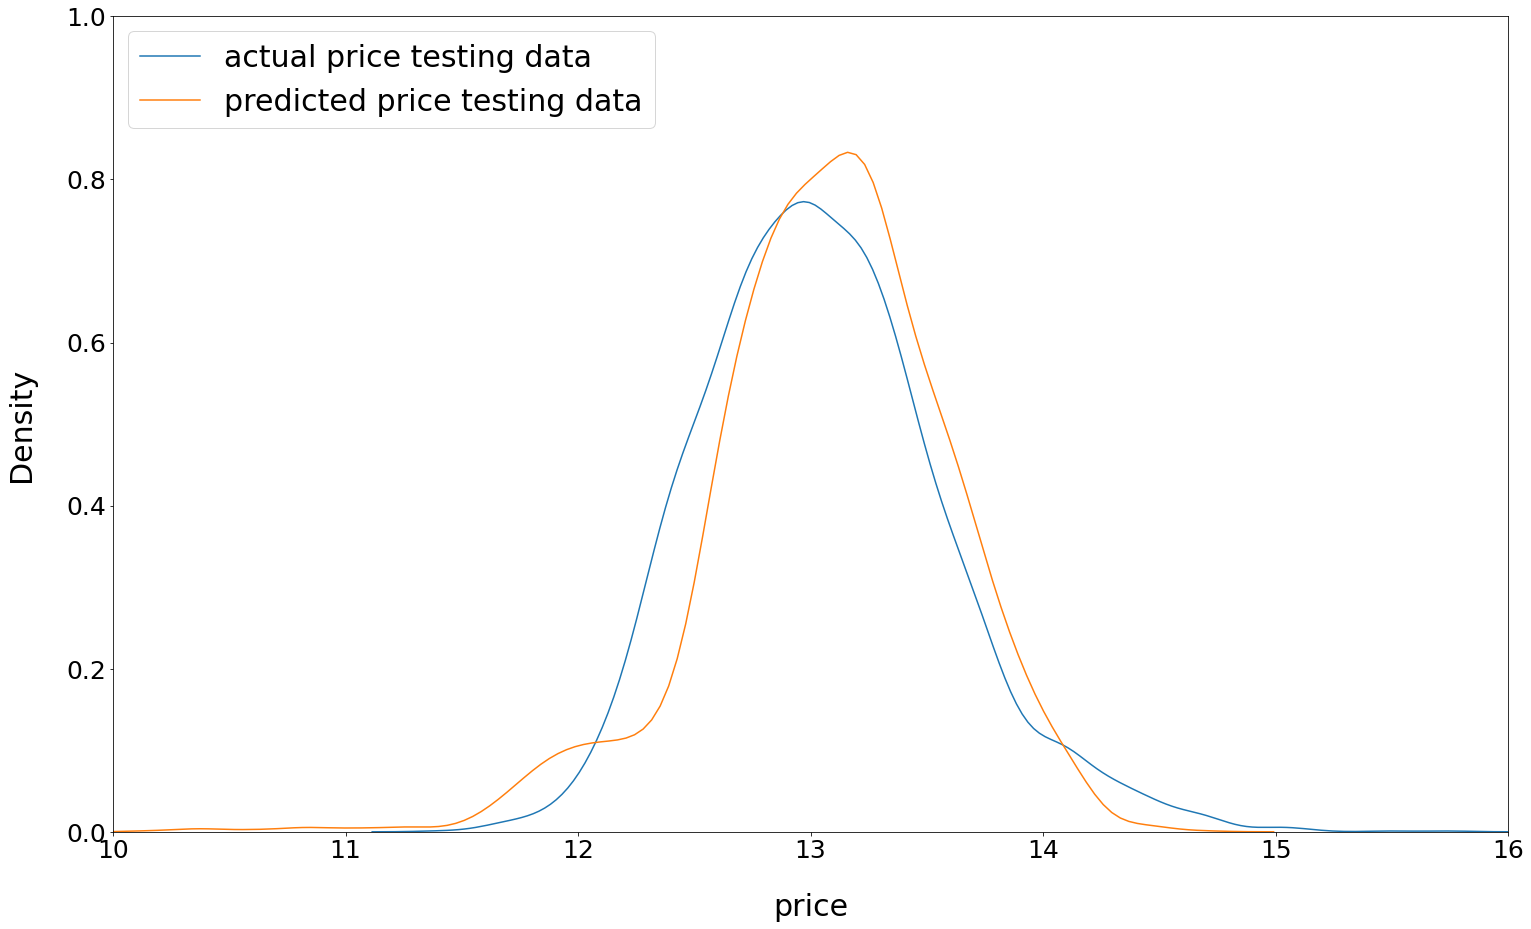

In [41]:
plt.figure(figsize=[25,15])
sns.kdeplot(np.log(y_test), label='actual price testing data')
sns.kdeplot(np.log(test_Yhat), label='predicted price testing data')
plt.xticks(size=25)
plt.yticks(size=25)
plt.xlabel('price', fontsize=30, labelpad=30)
plt.ylabel('Density', fontsize=30, labelpad=30)
plt.legend(fontsize=30, loc='upper left')
plt.xlim(10,16)
plt.ylim(0,1)
plt.show()

<p>

As we can see by looking at the two graphs, the model does not show excessive underfitting. If the model showed underfitting the distribution comparison for the testing data would be significantly different.

#### Testing for overfitting

In [42]:
poly = PolynomialFeatures(degree=5)

polynomial_transform_training = poly.fit_transform(x_train[['sqft_living', 'sqft_lot', 'floors', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']])
polynomial_transform_testing = poly.fit_transform(x_test[['sqft_living', 'sqft_lot', 'floors', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']])

polynomial_regression = LinearRegression()

polynomial_regression.fit(polynomial_transform_training, y_train)

training_yhat = polynomial_regression.predict(polynomial_transform_training)

testing_yhat = polynomial_regression.predict(polynomial_transform_testing)

<ipython-input-46-4dbd3f9e2b33>:4: RuntimeWarning: invalid value encountered in log
  sns.kdeplot(np.log(training_yhat), label='predicted price training data')


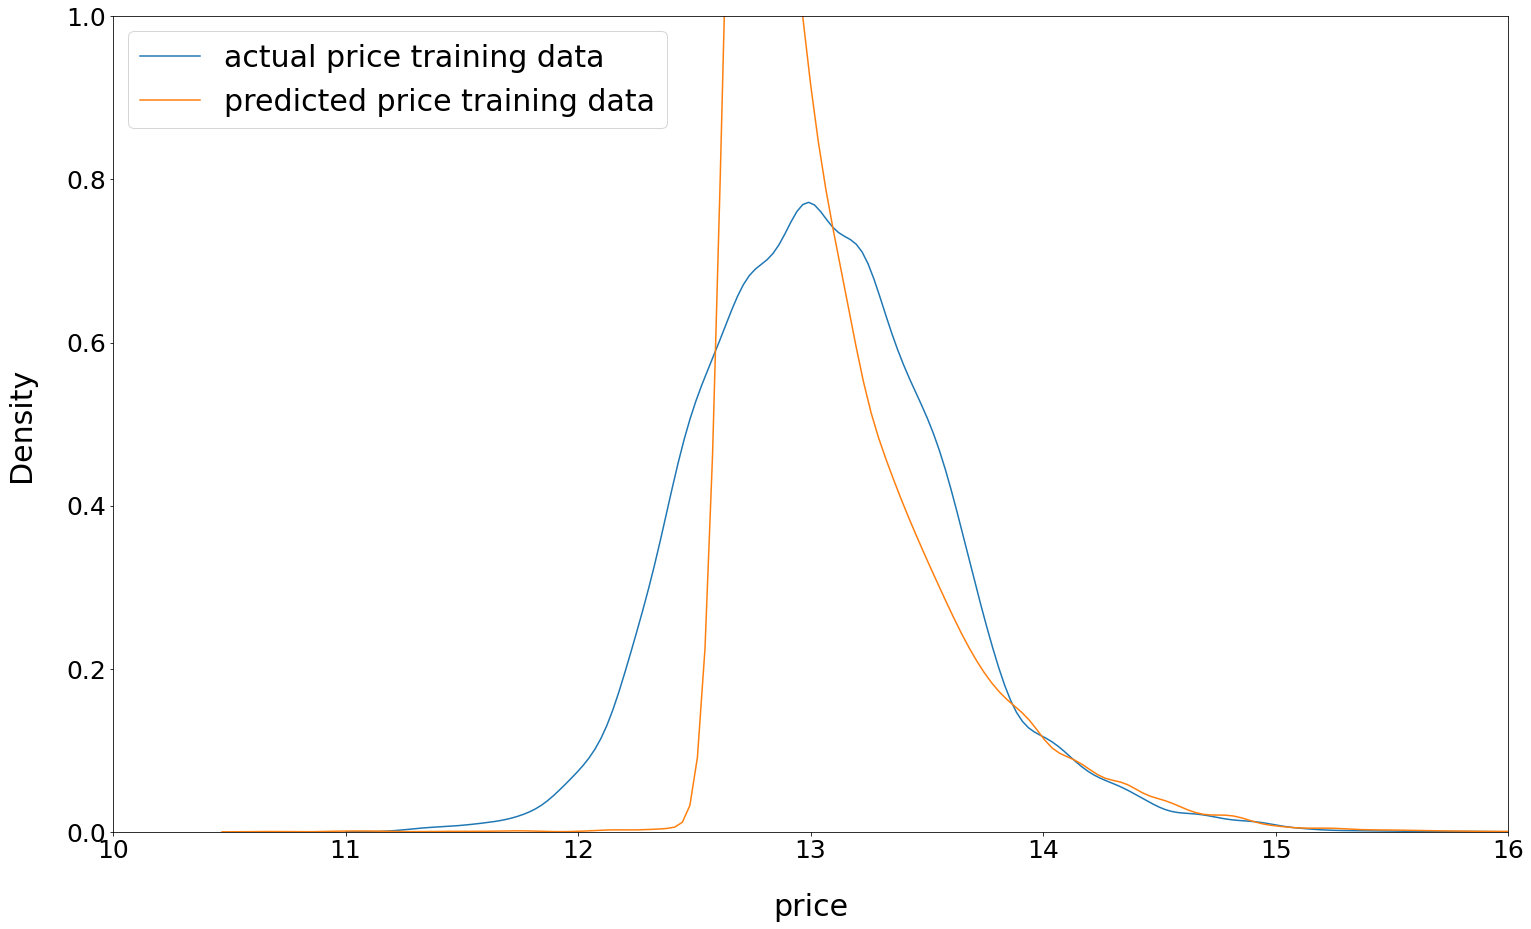

In [46]:
# Visualizing distribution of predictions for training data
plt.figure(figsize=[25,15])
sns.kdeplot(np.log(y_train), label='actual price training data')
sns.kdeplot(np.log(training_yhat), label='predicted price training data')
plt.xticks(size=25)
plt.yticks(size=25)
plt.xlabel('price', fontsize=30, labelpad=30)
plt.ylabel('Density', fontsize=30, labelpad=30)
plt.legend(fontsize=30, loc='upper left')
plt.xlim(10,16)
plt.ylim(0,1)
plt.show()

<ipython-input-47-a1a49270a8a9>:4: RuntimeWarning: invalid value encountered in log
  sns.kdeplot(np.log(testing_yhat), label='predicted price testing data')


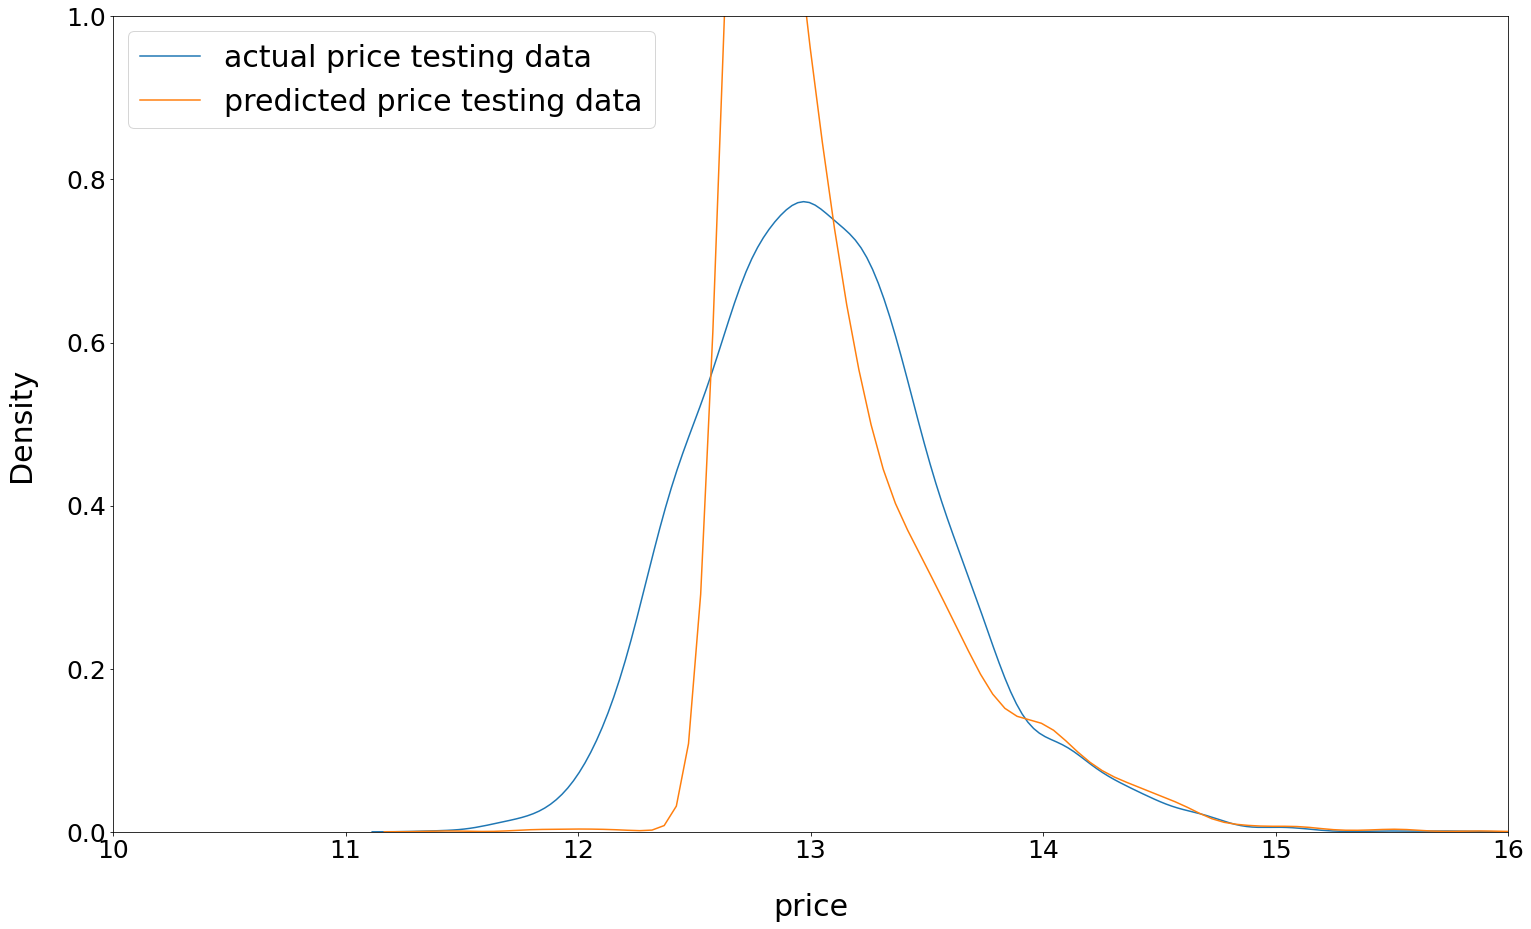

In [47]:
# Visualizing distribution of price predicitons for test data
plt.figure(figsize=[25,15])
sns.kdeplot(np.log(y_test), label='actual price testing data')
sns.kdeplot(np.log(testing_yhat), label='predicted price testing data')
plt.xticks(size=25)
plt.yticks(size=25)
plt.xlabel('price', fontsize=30, labelpad=30)
plt.ylabel('Density', fontsize=30, labelpad=30)
plt.legend(fontsize=30, loc='upper left')
plt.xlim(10,16)
plt.ylim(0,1)
plt.show()